<a href="https://colab.research.google.com/github/IndraniMandal/New-Revisions/blob/main/Model_Evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Model training and Evaluation
Our model after training may not perform well when predicting with a new data. This happens because our model does not generalize to the entire data set. The reason is also quite understandable when our training set is only a small set that cannot represent the entire data and moreover it may be noisy. Causes are divided into two main categories: undefitting and overfitting. 

## Overfitting and underfitting
In the example under, the blue dots represent data points. The green function represents the best possible model for this dataset - we don't know this function but this is what we are trying to find. The red function is the model we have built. As we tune our model we attempt to get as close to the green function as possible.

<img src="https://drive.google.com/uc?id=1BNRrcDmw6ktMI_vWlqPwXLVSJvdZ15ld" width =300>

**Figure 1** Plot of a training data set of N =
10 points, shown as blue circles,
each comprising an observation
of the input variable `x` along with
the corresponding target variable
`t`. The green curve shows the
function `sin(2πx) `used to generate the data. Our goal is to predict the value of `t` for some new
value of` x`, without knowledge of
the green curve.

### Overfitting resulting in inaccurate predictions 
In the first example, we see that the model is not complex enough to fit the green curve, and as a result, does not capture the trend of the samples. This is an example of **underfitting**. The last model is too complex and doesn't approximate the green function well. This model memorizes the data points. This model will have a very high training accuracy. This is a case of **overfitting**. When building a model, it is important to balance risk of over- and under- fitting.


 <img src="https://drive.google.com/uc?id=11xK46EBb7UdielML9_4mInb1J53SowHF" width =700>


In the figure at the top the red function in Figure 1 is very simple. It us a straight line which is far removed from the line of best fit(the green function). The error in this case is very large. In the top-right figure we increase the complexity of the model by tilting the red function at an angle. We notice a little improvement but it's still doesn't look like the line of best fit(green function). The model is still underfitting and not capturing the underlying pattern. In the bottom left figure the red function(model) gets pretty close to the green function. This is a good generalized model. This is s great model. The bottom right model is an example of overfitting where the models memorizes all the data points. The red function passes through all the data points. The model is too complex and does not generalize well with unknown data. This model will do very well with data it has seen already as it has memorized all data points. 

##Learning Curves

* It can be shown that *any model* can learn its training data perfectly - “memorize it”.  That is what the blue curve shows below. Any model can achieve a perfect score on the training data as long as it is allowed to be complex enough. Maximum complexity: the model has memorized the entire dataset.

* But memorizing is not the same as learning inherent patterns and use those patterns to make predictions!  Memorization is extremely bad at predicting future outcomes.  See what happens to the red line below as the model starts to memorize the training dataset -- the score on the test dataset actually falls!

> Memorization does not generalize well!

If we train a model using *training data* and then apply the model to a *validation/test data set* then we obtain these following typical curves:

<!-- ![model curves](assets/model-performance-curves.png) -->

<img src="https://raw.githubusercontent.com/IndraniMandal/ds-assets/main/assets/train-test-curves.png"  height="300" width="450">

**Note:** Validation/test data is data that the model has not seen yet as part of its training.


Simply put:

1. Undertrained models make a lot of errors on test data because they have not learned any of the patterns yet.

2. Overtrained models (models that have memorized their training data) make a lot of errors on test data because memorization is extremely bad at predicting the future outcomes.

3. The best models make a trade-off between errors and recognizing important patterns. Notice that for the best models the training score is not 100%!

> In order to find the best model we have to search its *parameter space* to find just the right complexity level.

### How do we detect overfitting or underfitting?
We can detect underfitting or overfitting by evaluating the model matrices (example model accuracy) over the training data. The training data is already seen by the model. If we provide enough examples and train with a complex enough model we should be able to generalize well over unseen data. 
Underfitting is like when someone doesn't spend enough time studying for an exam. They are unable to answer many questions, even the ones that were discussed in class. In this case the model hasn't trained enough and it has not learned the underlying patterns yet. We can detect underfitting when the accuracy over both training and testing data are poor. 
Overfitting is like when someone has memorized all questions from the class. They would do very well with questions from the class but will do poorly on questions they haven't seen before. The model has memorized all the data points. We can detect overfitting when the accuracy over the training data is very high but the accuracy over the testing data is poor in comparison. 

##Train, Test and Validate
In order to simulate the fact that a model is not able to see all possible data points during training we split our training data into two parts:

* Training data
* Testing/validation data

We will train our model on the training data as before but we will now test the model performance on the testing data which the model has not seen yet.

> That is, we force the model to make some generalizations.

Let's see if we can observe this learning behavior in decision trees.  We apply decision tree models to two different datasets where we build models of different complexities. 

###Load Pancreatinc cancer data

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score

In [2]:
url = 'https://raw.githubusercontent.com/IndraniMandal/ds-assets/main/assets/Pancreatic%20Cancer%202020.csv' # the URL
cancer_data = pd.read_csv(url) # Read the csv file and load the dataset into the notebook
cancer_data.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


## Data cleaning and preprocessing

In [3]:
cancer_data = cancer_data.drop(['sample_origin','patient_cohort','sample_id', 'stage', 'benign_sample_diagnosis'], axis = 1)

In [4]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()
cancer_data['sex'] = Le.fit_transform(cancer_data['sex'])

In [5]:
for c in cancer_data.columns:
    cancer_data[c].fillna(0,inplace = True)

###Split the Dataset into features and target
The first step in model creation is to split the dataset into features and target. Each feature specifies a characteristic of the dataset. The target is the label attached to each observation(each row of data).

In [6]:
features= cancer_data.drop('diagnosis', axis=1) # drop the target column

In [7]:
target = cancer_data.diagnosis

###Split the Dataset for training and testing


In [8]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=True, random_state=42)



*   `X_train` - Training features used to fit(train) the model
*   `y_train` - Training target labels used to fit(train) the model
*   `X_test`  - Testing features used to test the model
*   `y_test`  - True target labels used to compare againest the model predicted labels





## Model complexity
### Low Complexity Tree

Here we limit the depth of decision tree to 1.




In [9]:
# set up the tree model object
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=42)

# fit the model on the training set of data
dtree.fit(X_train, y_train)

# Prediction using Training data
pred_train = dtree.predict(X_train)
# Prediction using Testing data
pred_test = dtree.predict(X_test)

# Train results: evaluate the model on the training set of data
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, pred_train)))

# Test results: evaluate the model on the testing set of data
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, pred_test)))

Train Accuracy: 0.54
Test Accuracy: 0.47


[Ellipsis]

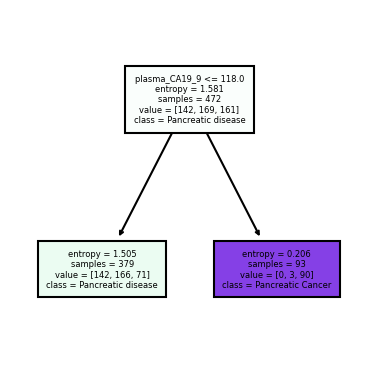

In [10]:
# Visualize the decision tree model
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(3,3), dpi=150)
plot_tree(dtree, fontsize=4, filled=True,
               max_depth=3,
               feature_names= features.columns,
               class_names= ['Healthy','Pancreatic disease','Pancreatic Cancer'])
[...]

Limiting the tree depth to 1 implies that we can only have a single if-then-else structure in the model.  That means the model can only discriminate between two alternatives. However, our data has three labels. Consequently, the points of one of the labels will be misclassified.  Interestingly enough, this shows up in the accuracy scores: Only roughly two thirds of the data points are classified correctly and one third is misclassified.  Looking at the model itself we see that it discriminates between `Pancreatic disease` and `Pancreatic Cancer` implying that it misclassifies points with the label `Healthy`.  

### Medium Complexity Tree
Here we limit the depth of the decision tree to 4.

In [11]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
dtree.fit(X_train, y_train)
pred_train = dtree.predict(X_train)
pred_test = dtree.predict(X_test)
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, pred_train)))
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, pred_test)))

Train Accuracy: 0.77
Test Accuracy: 0.65


[Ellipsis]

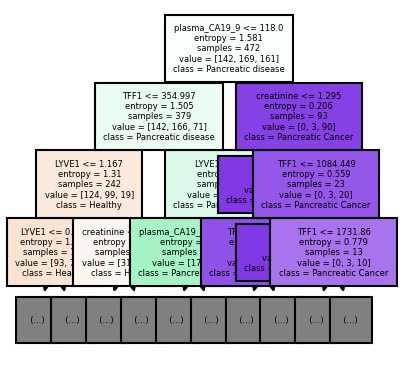

In [12]:
# Visualize the decision tree model
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(3,3), dpi=150)
plot_tree(dtree, fontsize=4, filled=True,
               max_depth=3,
               feature_names= features.columns,
               class_names= ['Healthy','Pancreatic disease','Pancreatic Cancer'])
[...]

###High Complexity Tree
Here we do not place any limits on the structure of the decision tree.

In [13]:
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth = None, random_state=42)
dtree.fit(X_train, y_train)
pred_train = dtree.predict(X_train)
pred_test = dtree.predict(X_test)
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, pred_train)))
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, pred_test)))

Train Accuracy: 1.00
Test Accuracy: 0.65


[Ellipsis]

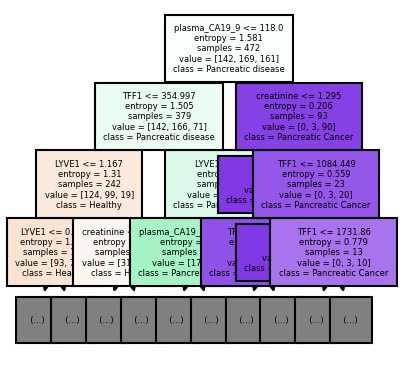

In [14]:
# Visualize the decision tree model
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(3,3), dpi=150)
plot_tree(dtree, fontsize=4, filled=True,
               max_depth=3,
               feature_names= features.columns,
               class_names= ['Healthy','Pancreatic disease','Pancreatic Cancer'])
[...]

Sure enough, if we look at the **test accuracy** of the three different models,

* low-complexity model: 0.47
* medium-complexity model: 0.65
* high-complexity model: 0.65

We see that the model performance behaves exactly as predicted by the learning curves above: The best model performance is by the medium-complexity model!
The **training accuracy** also behaves as predicted: the most complex model simply memorizes the dataset,

* low-complexity model: 0.57
* medium-complexity model: 0.77
* high-complexity model: 1.00

## Load Wisconsin breast Cancer Dataset

In [33]:
url = 'https://raw.githubusercontent.com/IndraniMandal/ds-assets/main/assets/wdbc.csv' # the URL
cancer_data = pd.read_csv(url)
cancer_data.head()

,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,2,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,3,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,4,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,5,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [34]:
# see if our data set is balanced
cancer_data['Diagnosis'].value_counts()

B    357
M    212
Name: Diagnosis, dtype: int64

###Split the data

In [35]:
features= cancer_data.drop('Diagnosis', axis=1) # drop the target column
target = cancer_data.Diagnosis

In [37]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.7,test_size=0.3, random_state=1)

## Model complexity comparison
### Low complexity 

In [38]:
dtree_low = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1)
dtree_low.fit(X_train, y_train)
pred_train_low = dtree_low.predict(X_train)
pred_test_low = dtree_low.predict(X_test)
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, pred_train_low)))
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, pred_test_low)))

Train Accuracy: 0.94
Test Accuracy: 0.85


[Ellipsis]

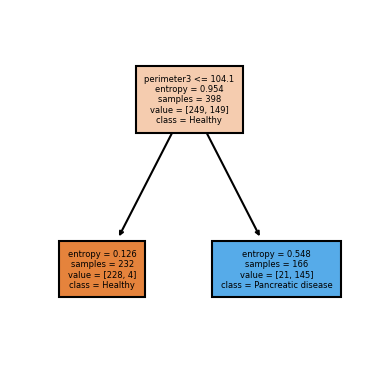

In [39]:
fig, axes = plt.subplots(1, 1, figsize=(3,3), dpi=150)
plot_tree(dtree_low, fontsize=4, filled=True,
               max_depth=3,
               feature_names= features.columns,
               class_names= ['Healthy','Pancreatic disease','Pancreatic Cancer'])
[...]

###Medium Complexity

In [41]:
dtree_medium = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=2)
dtree_medium.fit(X_train, y_train)
pred_train_medium  = dtree_medium.predict(X_train)
pred_test_medium  = dtree_medium.predict(X_test)
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, pred_train_medium )))
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, pred_test_medium )))

Train Accuracy: 0.99
Test Accuracy: 0.92


[Ellipsis]

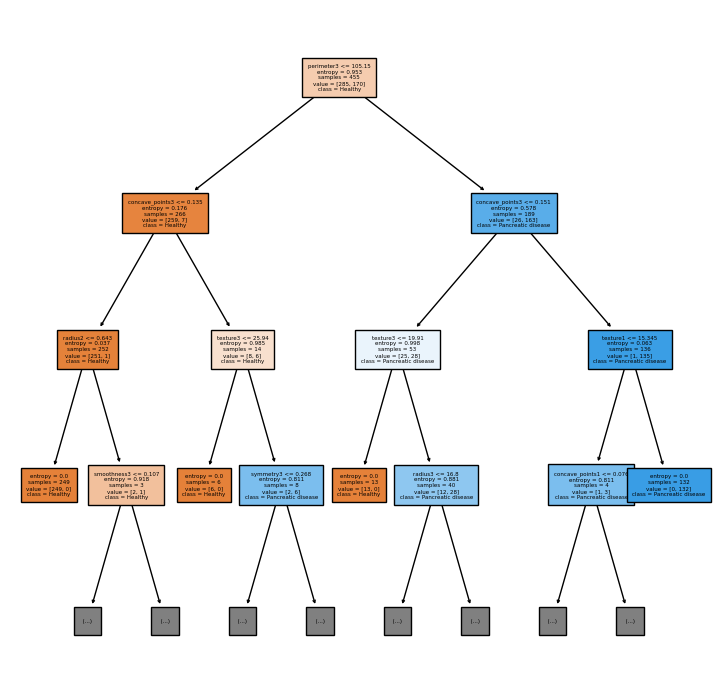

In [22]:
# Visualize the decision tree model
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(9,9), dpi=100)
plot_tree(dtree_medium, fontsize=4, filled=True,
               max_depth=3,
               feature_names= features.columns,
               class_names= ['Healthy','Pancreatic disease','Pancreatic Cancer'])
[...]

###High Complexity

In [43]:
dtree_high = tree.DecisionTreeClassifier(criterion='entropy', max_depth= None, random_state=1)
dtree_high.fit(X_train, y_train)
pred_train_high = dtree_high.predict(X_train)
pred_test_high = dtree_high.predict(X_test)
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, pred_train_high)))
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, pred_test_high)))

Train Accuracy: 1.00
Test Accuracy: 0.89


[Ellipsis]

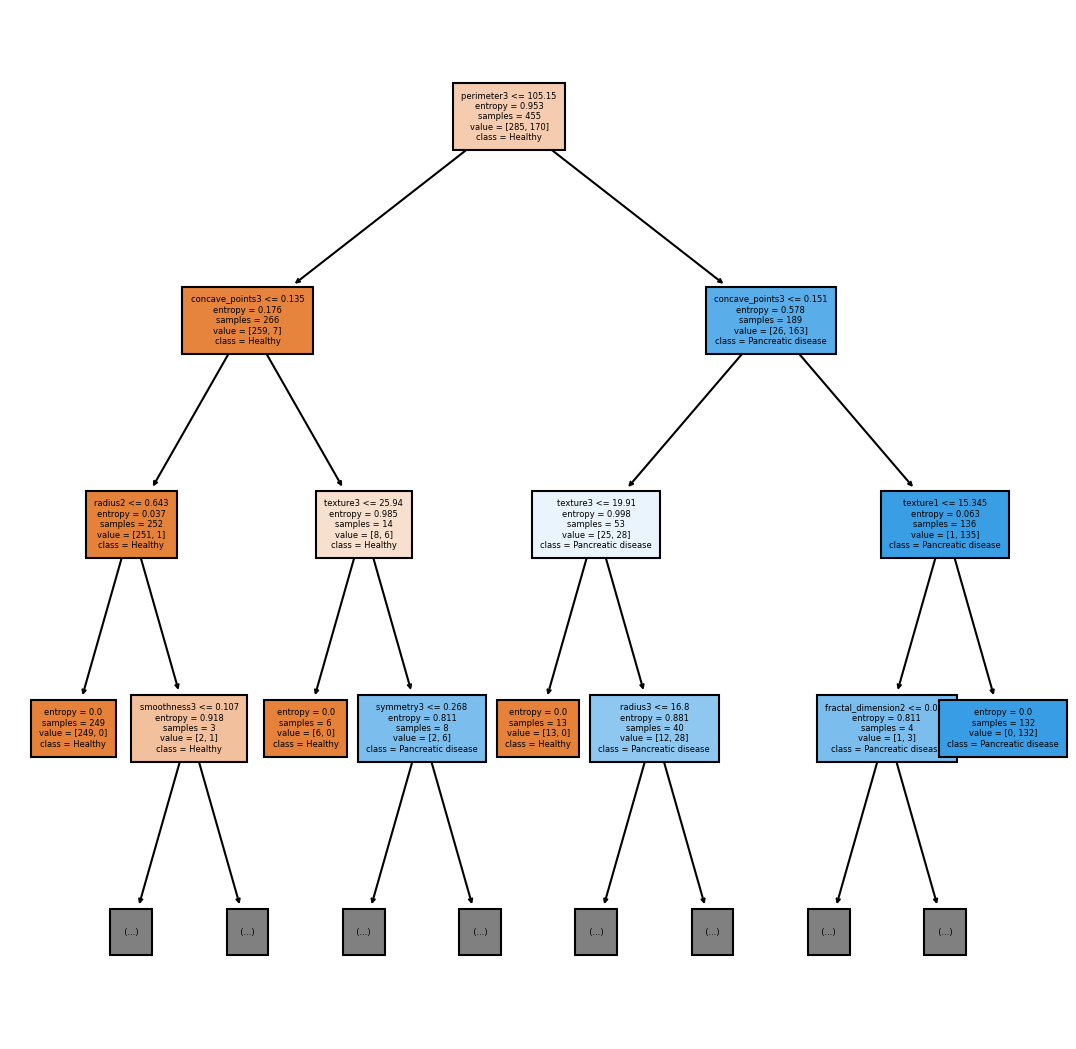

In [24]:
# Visualize the decision tree model
import matplotlib.pyplot as plt  # visualization library
from sklearn.tree import plot_tree
fig, axes = plt.subplots(1, 1, figsize=(9,9), dpi=150)
plot_tree(dtree_high, fontsize=4, filled=True,
               max_depth=3,
               feature_names= features.columns,
               class_names= ['Healthy','Pancreatic disease','Pancreatic Cancer'])
[...]

#Model metrics
We have to pick some metrics against which we can compare the models. We have already talked about `accuracy`. Other metrics used are `precision`, `recall`, `f1-score`,and `AUROC score`. Using the different metrics we can compare model performance and thus pick the best possible model. 

In [44]:
 #Import accuracy score and balanced accuracy score from model metrics package
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, balanced_accuracy_score

def model_metrics(y_true, y_predict):
  accuracy= accuracy_score(y_true, y_predict)
  precision=precision_score(y_true, y_predict, average='micro')
  recall=recall_score(y_true, y_predict, average='micro')
  f1=f1_score(y_true, y_predict, average='micro')
  balanced_accuracy=balanced_accuracy_score(y_true, y_predict)
  return [accuracy, precision, recall, f1, balanced_accuracy]


### Low Complexity


In [45]:
#calculate the model metrics by comparing the true training target and the predicted values
low_train_metrics= model_metrics(y_train, pred_train_low)
#calculate the model metrics by comparing the true testing target and the predicted values
low_test_metrics = model_metrics(y_test, pred_test_low)

Notice that we are using the training data for prediction(`pred_train`) as well. We are using `pred_train` to calculate the training accuracy by comparing the true training target values and the predicted values. This will help us to see if the model is overfitting or underfitting. 

###Medium Complexity

In [46]:
#calculate the model metrics by comparing the true training target and the predicted values
medium_train_metrics= model_metrics(y_train, pred_train_medium)
#calculate the model metrics by comparing the true testing target and the predicted values
medium_test_metrics = model_metrics(y_test, pred_test_medium)

###Hign Complexity

In [47]:
#calculate the model metrics by comparing the true training target and the predicted values
high_train_metrics= model_metrics(y_train, pred_train_high)
#calculate the model metrics by comparing the true testing target and the predicted values
high_test_metrics = model_metrics(y_test, pred_test_high)

In [48]:

df_low = pd.DataFrame([ low_train_metrics, low_test_metrics],  columns=['Accuracy', 'Pecision', 'Recall', 'F1 score', 'Balanced accuracy'], 
                      index =['Train', 'Test'] )
df_medium = pd.DataFrame([ medium_train_metrics, medium_test_metrics],  columns=['Accuracy', 'Pecision', 'Recall', 'F1 score', 'Balanced accuracy'], 
                      index =['Train', 'Test'] )
df_high = pd.DataFrame([ high_train_metrics, high_test_metrics],  columns=['Accuracy', 'Pecision', 'Recall', 'F1 score', 'Balanced accuracy'], 
                      index =['Train', 'Test'] )
all_metrics_values={"Low Complexity": df_low,
    "Medium Complexity": df_medium,
    "High Complexity": df_high}
all_metrics_values


{'Low Complexity':        Accuracy  Pecision    Recall  F1 score  Balanced accuracy
 Train  0.937186  0.937186  0.937186  0.937186           0.944409
 Test   0.847953  0.847953  0.847953  0.847953           0.849868,
 'Medium Complexity':        Accuracy  Pecision    Recall  F1 score  Balanced accuracy
 Train  0.989950  0.989950  0.989950  0.989950           0.986577
 Test   0.918129  0.918129  0.918129  0.918129           0.905423,
 'High Complexity':        Accuracy  Pecision    Recall  F1 score  Balanced accuracy
 Train  1.000000  1.000000  1.000000  1.000000           1.000000
 Test   0.888889  0.888889  0.888889  0.888889           0.878968}

### Comparing the model metrics 


In [49]:
import plotly.graph_objects as go

def plot_bar_results(dataset_type, all_metrics_values):
    fig = go.Figure()
    for model_name, metrics_df in all_metrics_values.items():
        metrics_names = list(metrics_df.columns)
        values = metrics_df.loc[dataset_type].to_numpy()
        fig.add_trace(go.Bar(y=values, x=metrics_names, name=model_name))
    fig.update_layout(barmode="group", xaxis_tickangle=-45, title_text=dataset_type+" Dataset")
    fig.show()

### Plot the model metrics

In [50]:
plot_bar_results("Train", all_metrics_values)

It seems like the High Complexity model is overfitting. The training accuracy is 100%, which indicates memorization. Let's check how these models fair with the Test data. 

In [51]:
plot_bar_results("Test", all_metrics_values)

Again, we find that the **test accuracy** of the three different models behaves just as predicted by our learning curves above.

The best model performance is by the medium-complexity model! The **training accuracy** also behaves as predicted: the most complex model simply memorizes the dataset.